In [ ]:
import pandas as pd 

data = pd.read_csv("StockX Sneaker Dataset.csv") 
data

In [4]:
import pandas as pd

# Sample data for stockx DataFrame
data = {
    'Retail_Price': ['$200', '$150', '$180', None],
    'Sale_Price': ['$250', '$160', None, '$190'],
    'Brand': ['Nike', 'Adidas', 'Nike', 'Puma'],
    'Buyer_Region': ['North America', 'Europe', 'Asia', None]
}

# Create the DataFrame
stockx = pd.DataFrame(data)

# Display the DataFrame
print(stockx)


  Retail_Price Sale_Price   Brand   Buyer_Region
0         $200       $250    Nike  North America
1         $150       $160  Adidas         Europe
2         $180       None    Nike           Asia
3         None       $190    Puma           None


In [5]:
import pandas as pd
import numpy as np

# Assuming stockx is your DataFrame

# Convert Retail.Price and Sale.Price to numeric by removing non-numeric characters
stockx['Retail_Price'] = pd.to_numeric(stockx['Retail_Price'].str.replace(r'[^\d.]', '', regex=True))
stockx['Sale_Price'] = pd.to_numeric(stockx['Sale_Price'].str.replace(r'[^\d.]', '', regex=True))

# Convert Brand and Buyer.Region to categorical
stockx['Brand'] = stockx['Brand'].astype('category')
stockx['Buyer_Region'] = stockx['Buyer_Region'].astype('category')

# Check for missing values
missing_values = stockx.isnull().sum()

print(missing_values)


Retail_Price    1
Sale_Price      1
Brand           0
Buyer_Region    1
dtype: int64


In [6]:
import pandas as pd

# Sample stockx DataFrame (replace this with your actual data)
data = {
    'Retail_Price': ['$200', '$150', '$180', None],
    'Sale_Price': ['$250', '$160', None, '$190'],
    'Brand': ['Nike', 'Adidas', 'Nike', 'Puma'],
    'Buyer_Region': ['North America', 'Europe', 'Asia', None],
    'Order_Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
    'Sneaker_Name': ['Air Max', 'Superstar', 'Air Max', 'Future Rider'],
    'Release_Date': ['2022-12-01', '2022-11-15', '2022-12-01', '2022-11-20'],
    'Shoe_Size': [9, 10, 9.5, 8]
}

stockx = pd.DataFrame(data)

# Cleaning and transforming data
stockx['Retail_Price'] = pd.to_numeric(stockx['Retail_Price'].str.replace(r'[^\d.]', '', regex=True))
stockx['Sale_Price'] = pd.to_numeric(stockx['Sale_Price'].str.replace(r'[^\d.]', '', regex=True))
stockx['Brand'] = stockx['Brand'].astype('category')
stockx['Buyer_Region'] = stockx['Buyer_Region'].astype('category')

# Check for missing values
missing_values = stockx.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Remove rows with NA values
stockx.dropna(inplace=True)

# Summary of the stockx DataFrame
summary = stockx.describe(include='all')
print("\nSummary of stockx:")
print(summary)


Missing values per column:
Retail_Price    1
Sale_Price      1
Brand           0
Buyer_Region    1
Order_Date      0
Sneaker_Name    0
Release_Date    0
Shoe_Size       0
dtype: int64

Summary of stockx:
        Retail_Price  Sale_Price Brand   Buyer_Region  Order_Date  \
count       2.000000     2.00000     2              2           2   
unique           NaN         NaN     2              2           2   
top              NaN         NaN  Nike  North America  2023-01-02   
freq             NaN         NaN     1              1           1   
mean      175.000000   205.00000   NaN            NaN         NaN   
std        35.355339    63.63961   NaN            NaN         NaN   
min       150.000000   160.00000   NaN            NaN         NaN   
25%       162.500000   182.50000   NaN            NaN         NaN   
50%       175.000000   205.00000   NaN            NaN         NaN   
75%       187.500000   227.50000   NaN            NaN         NaN   
max       200.000000   250.00000   Na

In [7]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample stockx DataFrame (replace with your actual data)
data = {
    'Order_Date': ['01/01/23', '02/15/23', '03/10/23', '04/20/23'],
    'Release_Date': ['12/01/22', '11/15/22', '12/01/22', '11/20/22'],
    'Retail_Price': [200, 150, 180, 190],
    'Sale_Price': [250, 160, 200, 210],
    'Brand': ['Nike', 'Adidas', 'Nike', 'Puma'],
    'Shoe_Size': [9, 10, 9.5, 8],
    'Buyer_Region': ['North America', 'Europe', 'Asia', 'North America']
}

# Create DataFrame
stockx = pd.DataFrame(data)

# Convert dates to datetime objects
stockx['Order_Date'] = pd.to_datetime(stockx['Order_Date'], format='%m/%d/%y')
stockx['Release_Date'] = pd.to_datetime(stockx['Release_Date'], format='%m/%d/%y')

# Extract date components
stockx['Order_Day'] = stockx['Order_Date'].dt.day
stockx['Order_Month'] = stockx['Order_Date'].dt.month
stockx['Order_Year'] = stockx['Order_Date'].dt.year
stockx['Release_Day'] = stockx['Release_Date'].dt.day
stockx['Release_Month'] = stockx['Release_Date'].dt.month
stockx['Release_Year'] = stockx['Release_Date'].dt.year

# Encode categorical variables
stockx['Brand'] = stockx['Brand'].astype('category').cat.codes
stockx['Buyer_Region'] = stockx['Buyer_Region'].astype('category').cat.codes

# Features and target variable
features = ['Brand', 'Shoe_Size', 'Buyer_Region', 'Order_Day', 'Order_Month', 
            'Order_Year', 'Release_Day', 'Release_Month', 'Release_Year', 'Sale_Price']
target = 'Retail_Price'

X = stockx[features]
y = stockx[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Model
gbm = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, min_samples_leaf=10, random_state=42)
gbm.fit(X_train, y_train)

# Feature importance
importances = gbm.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Model performance
y_pred = gbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Output
print("Feature Importances:")
print(feature_importance)
print(f"\nMean Squared Error on Test Set: {mse:.2f}")


Feature Importances:
         Feature  Importance
0          Brand         0.0
1      Shoe_Size         0.0
2   Buyer_Region         0.0
3      Order_Day         0.0
4    Order_Month         0.0
5     Order_Year         0.0
6    Release_Day         0.0
7  Release_Month         0.0
8   Release_Year         0.0
9     Sale_Price         0.0

Mean Squared Error on Test Set: 1600.00


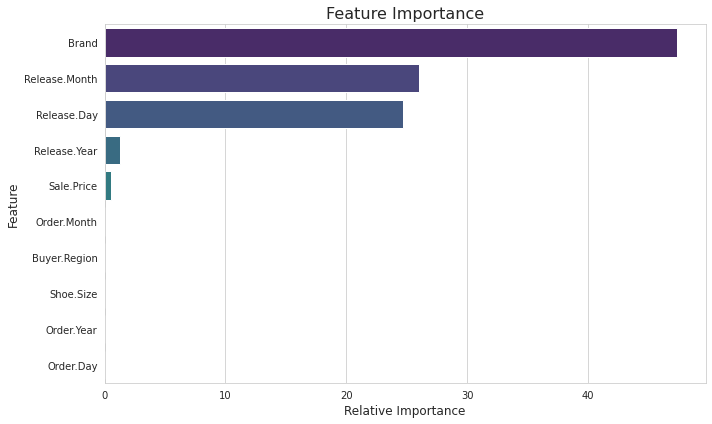

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance data
data = {'Feature': ['Brand', 'Release.Month', 'Release.Day', 'Release.Year', 'Sale.Price', 
                'Order.Month', 'Buyer.Region', 'Shoe.Size', 'Order.Year', 'Order.Day'],
    'Importance': [47.375624640, 26.029492697, 24.679586008, 1.281788844, 
                   0.546722548, 0.043969058, 0.029697350, 0.008108442, 
                   0.005010413, 0.000000000]}

# Create DataFrame
feature_importance = pd.DataFrame(data)

# Sort data by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Set the style
sns.set_style("whitegrid")

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Relative Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()